# Homework

1) Calculate and plot the ratio F(n)/F(n-1) with respect to n using memorization method.

2) 

    a) Use the Recursion method, Tabulation method,  and matrix method to calculate the time spent for different n (e.g. 1, 10, 100, 1000, 10000, … uniform in the log space). 

    b) For each method, output the time and n into a file
       
    c) Read from the file and plot log(time) (y-axis) vs. log(n) (x-axis) for different methods. 
       
    d) Discuss the complexity of each method.

<ipython-input-73-e159875cc593>:35: RuntimeWarning: divide by zero encountered in long_scalars
  return fib_num/fib_denom


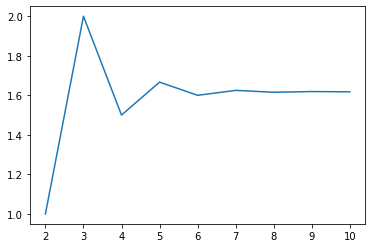

In [73]:
# memoization method stores the results of functions 
# if function repeats less time is used solving it due to storage of function 

import time # allows for time calculation and label of actual time
import numpy as np # numpy 
import pylab as p  # import Matplotlib label it as p
import matplotlib.pyplot as plt   # Load Matplotlib


# first create memoization 
# see lec3-pre notes !!!!


def fib_memo(n, table): # 'n' is input num and 'table' is storage 
    if n == 0 or n == 1:  # initial values for fibonacci sequence 
        table[n]= n      # this is telling comp to store 'n'in position 'n' within storage
    if table[n] is None:  # 'None' is specific. This is saying if 'n' not in table, store it
        table[n] = fib_memo(n-1,table) + fib_memo(n-2,table) # this calculates f[n]      
    return table[n]

# test function up to this point
# n= 10 
# table = [None]*(n+1)   # allows for correct dimensions 
# start_time = time.time()
# print('for n =', n, '; f(n)= ',fib(n, table)/fib(n-1,table)," and takes %s seconds " % (time.time() - start_time))
# correct output 

# next we are creating a function to find the ratio of f(n)/f(n-1)

def fib_ratio(n): # we are piggybacking off of the 'fib_memo' doing the calculations
    table = [None]*(n+1)  # assigning TABLE in definition keeps ruining plot, so keep definition just 'n'!!!!!
    table[0]= 0   # sets arg range
    fib_num = fib_memo(n,table) # assigning 'fib_memo' within 'fib_ratio' function
    fib_denom = table[n-1] # in memo table[n] = n so table[n-1] = n-1 
    return fib_num/fib_denom


# test function up to this point
#n= 5
#table = [None]*(n+1)   # allows for correct dimensions 
#start_time = time.time()
#print('for n =', n, '; f(n)= ',fib_ratio(n)," and takes %s seconds " % (time.time() - start_time))
# correct output 
# can't do n = 0 which probably can be accounted for somehow, TBD 

# next we create the plot components 
x_value = np.arange(1,11)  # set range 0-30
y_value = []  # this is from above definition fib_ratio 
for x in x_value:
    y_value.append(fib_ratio(x))
plt.plot(x_value,y_value)
plt.show()

In [23]:
import time # allows for time calculation and label of actual time
import numpy as np # numpy 
import pylab as p  # import Matplotlib label it as p
import matplotlib.pyplot as plt   # Load Matplotlib

fib_log = open('HW2data.txt','a') # see - https://www.geeksforgeeks.org/reading-writing-text-files-python/

# ```````````````````````````````````````````````````````````````````
#  methods defined

# tabluation method eg: saves calculations 
def table_fib(n):
    table=[0]*(n+1)
    table[1] = 1
    for i in range(2,n+1):
        table[i]= table[i-1] + table[i-2]
    return table[n]


# recusion method 
def rec_fib(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    elif (n>2):
        return rec_fib(n-1) + rec_fib(n-2)

# matrix method from lec3-pre
def arrpow(arr, n): # 'arrpow' is the function!!!
    yarr=arr  # see: https://pypi.org/project/yarr/ 
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

# arrpow is just a TOOL. use it for another defined function such as
def test_arrpow(n):
    arr= [[1,1],[1,0]]  # fib matrix defined - see lec3-pre for matrix in latex form
    f=arrpow(arr,n-1)[0][0]
    return f

#print(test_arrpow(20))

# `````````````````````````````````````````````````````````````````````````
# plugging actual numbers into methods and SAVING them in file we opened 
# notice we'll have 4 columns 'n','meth 1 time', 'meth 2 time', 'meth 3 time'

n_exp = np.arange(1,10000,10) # log space 

for num in n_exp:
    line = [None]*(4) #sets dimensions
    line[0] = num # logs 'n' in file
    
# table method line 1
    start_time_table = time.time() #time it takes to do table calculations
    a = table_fib(num) # association
    line[1] = start_time_table - time.time() # value logged
    
# recusion method line 2
    start_time_rec=time.time()
    if num == 0:
        rec_fib = 0
    elif num == 1:
        rec_fib=1
    elif num >2:
    return
        
    a = rec_fib(num)
    line[2]=start_time_rec-time.time()

# matrix method line 3



    fib_log.write(str(line[0])+' '+str(line[1])+' '+str(line[2])+' '+str(line[3]))
    # write... has ONE argument, ...+'  '+... allows for space
    # see - https://stackoverflow.com/questions/44768413/python-save-strings-and-numbers-to-a-txt-file
  
fib_log.close()

IndentationError: expected an indented block (<ipython-input-23-0b8520c43a2f>, line 74)